In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import chi2_contingency
#from scipy.stats.contingency import association
## Generating a Q-Q plot
#import statsmodels.api as sm  
%matplotlib inline 

file = "amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.
Crosstab Analysis:



# 1. Crosstab Analysis:
- Create a crosstab between the product category and the isBestSeller status.
- Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [2]:
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

print("Crosstab:")
crosstab_result

Crosstab:


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [3]:
# Crosstab with proportions within each category
crosstab_proportions  = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')


# Sort categories by prevalence of best-sellers
best_seller_prevalence = crosstab_proportions.sort_values(by=crosstab_proportions.columns[-1], ascending=False)

print("\nBest-Seller Prevalence by Product Category (Proportion)")
display(best_seller_prevalence.round(3))


Best-Seller Prevalence by Product Category (Proportion)


isBestSeller,False,True
category,,
Grocery,0.942,0.058
Smart Home Security & Lighting,0.942,0.058
Health & Personal Care,0.942,0.058
Mobile Phone Accessories,0.958,0.042
Power & Hand Tools,0.965,0.035
...,...,...
"CD, Disc & Tape Players",1.000,0.000
General Music-Making Accessories,1.000,0.000
Snowboard Boots,1.000,0.000


# 2.Statistical Tests:

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.


In [4]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product
from scipy.stats import chi2_contingency
# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

print(f"Chi-square Statistic: {chi2_statistic:.2f}")
print(f"P-value: {chi2_p_value:.4f}")

Chi-square Statistic: 36540.20
P-value: 0.0000


In [5]:
from scipy.stats.contingency import association
# Compute Cramér's V to understand the strength of association between best-seller status and category.
# Computing the association between variables in 'crosstab_result' using the "cramer" method
cramers_v = association(crosstab_result, method="cramer")

print(f"Cramér's V: {cramers_v:.3f}")


Cramér's V: 0.122


# 3. Visualizations:
Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


<Figure size 1200x600 with 0 Axes>

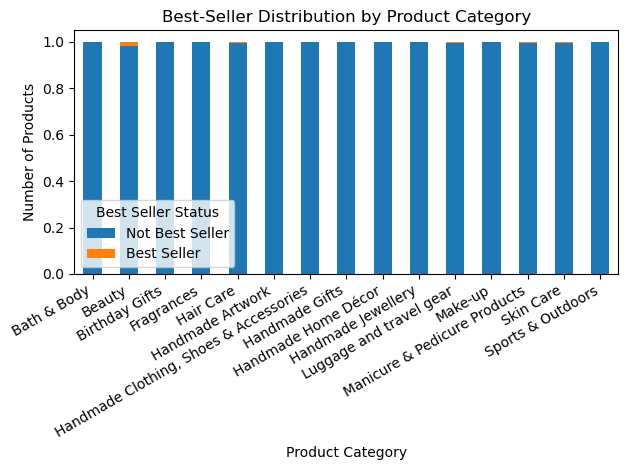

In [6]:
# Filter top categories
top_categories = df['category'].value_counts().nlargest(15).index
filtered_df = df[df['category'].isin(top_categories)]

# Crosstab with proportions
crosstab_normalized = pd.crosstab(
    filtered_df['category'], 
    filtered_df['isBestSeller'], 
    normalize='index'
)

# Plotting a stacked bar chart for the 'crosstab_result' data
plt.figure(figsize=(12, 6))
crosstab_normalized.plot(kind="bar", stacked=True)


plt.title("Best-Seller Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.legend(title="Best Seller Status", labels=["Not Best Seller", "Best Seller"])

plt.tight_layout()
plt.show()

interpretations:
P-value :
The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low ( p )-value (0.0000), we reject the null hypothesis. This implies that there's a significant association between category and isBestSeller in the dataset. 

Cramér's V:
Our result 0.122 suggest that the strength of the relationship between Best-seller and Category is not very strong.

stacked bar chart: 
The majority of the products are not best-sellers. It means that it not easy to become best-seller.
We have few category with best-sellers and Beauty is the category with the most best_seller even if it represent a very small fraction of the total. The distribution shows by the chart confirms the result of the Chi that the best-seller status depend of the catégory but the strenght of the correlation is not significant with a Cramér's V(0.12). 

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [7]:
def price_test_outliers(df):
    # Discretizing 'SalePrice' into quartiles
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3-Q1


    # # Define bounds for the outliers
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Identify the outliers
    outliers = df['price'][(df['price'] < lower_bound) | (df['price'] > upper_bound)]
    
    
    # Print summary
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers detected: {len(outliers)}")
    
    return outliers, lower_bound, upper_bound
    
# Call the function 
outliers, lower_bound, upper_bound = price_test_outliers(df)
print(outliers.head())

# clean the outlier
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_clean

Q1: 9.99, Q3: 45.99, IQR: 36.00
Lower bound: -44.01, Upper bound: 99.99
Number of outliers detected: 327688
10    139.00
19    164.99
25    149.99
28    289.00
31    199.99
Name: price, dtype: float64


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# 1.Violin Plots:

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
- Which product category tends to have the highest median price? Don't filter here by top categories.


<Figure size 1400x600 with 0 Axes>

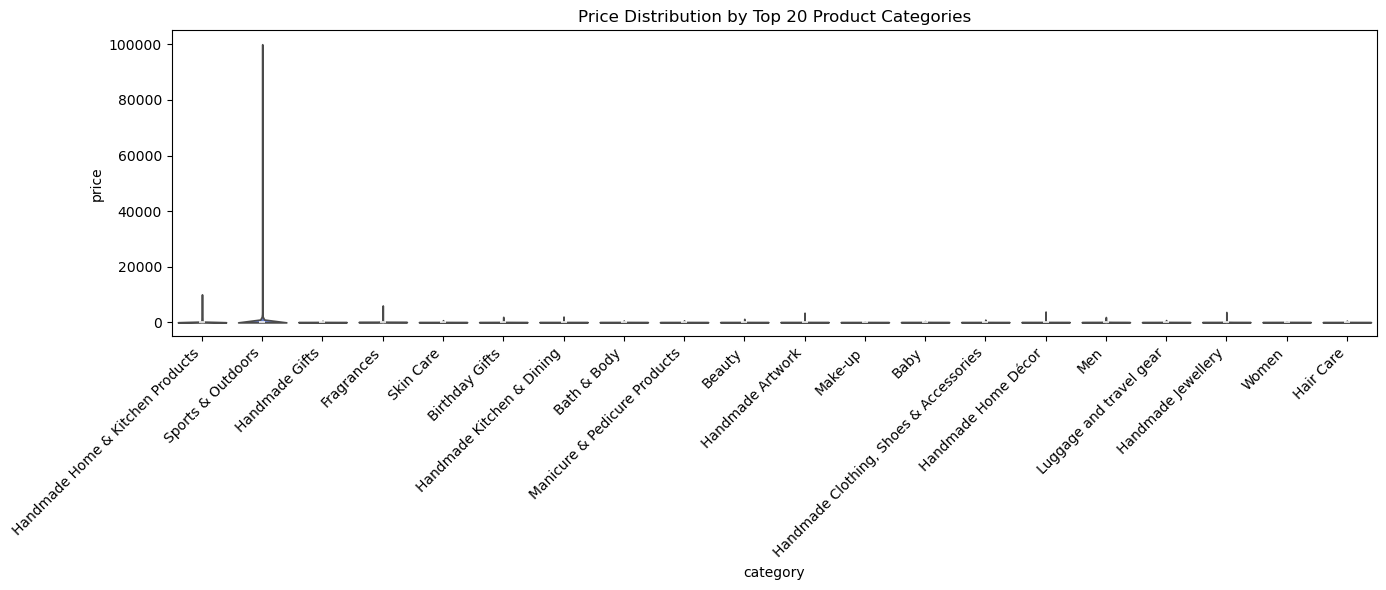

Median price by category (descending):
category
Laptops                                1042.725
Desktop PCs                             810.400
Snowboards                              366.725
Home Audio Record Players               326.080
3D Printers                             319.000
Motorbike Exhaust & Exhaust Systems     313.830
Graphics Cards                          259.980
Snowboard Boots                         258.990
Lenses                                  249.990
Barebone PCs                            244.990
Name: price, dtype: float64


In [14]:
# 1.Violin Plots:

# Filter top 20 categories by count
top_categories = df['category'].value_counts().nlargest(20).index
filtered_df = df[df['category'].isin(top_categories)]

# Plotting a violin plot to visualize the distribution of 'price' for top 20 categories, using the "coolwarm" color palette
plt.figure(figsize=(14, 6))
sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm", hue='category', legend=False)

plt.title("Price Distribution by Top 20 Product Categories")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    # calculate the median price by category without filter
median_prices = df.groupby('category')['price'].median().sort_values(ascending=False)
print("Median price by category (descending):")
print(median_prices.head(10)) 


# interpretation :
The product category that tends to have the highest median price is Laptops

# 2.Bar Charts:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.

C:\Users\davyg\AppData\Local\Temp\ipykernel_24596\1330303050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices_top10.index, y=avg_prices_top10.values, palette="viridis")


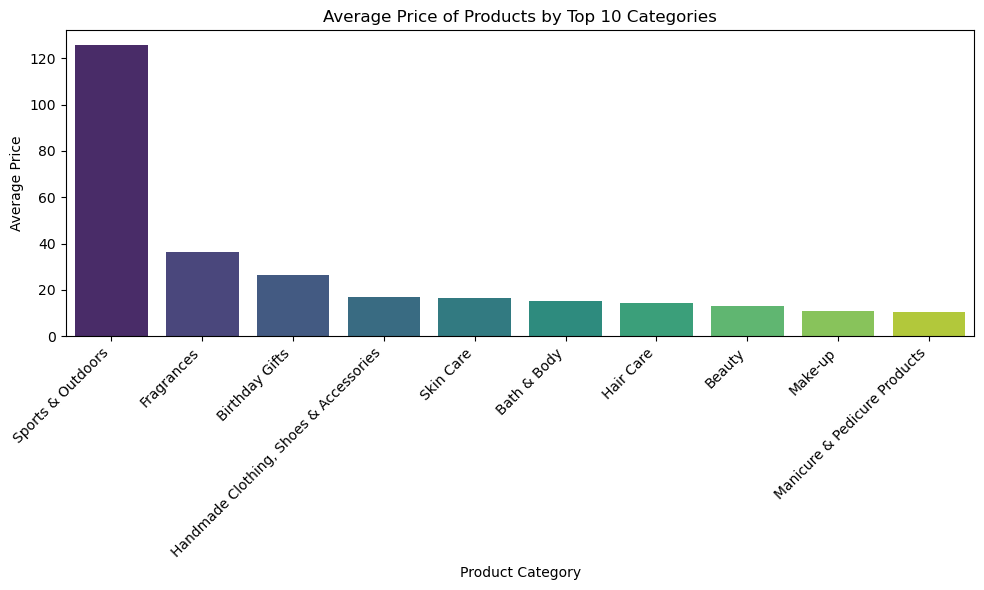

Category with highest average price (all categories):
category
Laptops    1087.987827
Name: price, dtype: float64


In [15]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count)
# Top 10 categories by count 
top10_categories = df['category'].value_counts().nlargest(10).index
filtered_df = df[df['category'].isin(top10_categories)]

# Average price per category (top 10)
avg_prices_top10 = filtered_df.groupby('category')['price'].mean().sort_values(ascending=False)

#  Bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices_top10.index, y=avg_prices_top10.values, palette="viridis")

plt.title("Average Price of Products by Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Highest average price across ALL categories
avg_prices_all = df.groupby('category')['price'].mean().sort_values(ascending=False)
print("Category with highest average price (all categories):")
print(avg_prices_all.head(1))

# interpretation : 
Sports & Outdoors are the most frequent category.
and laptops has the higher average price.

# 3.Box Plots:

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.



C:\Users\davyg\AppData\Local\Temp\ipykernel_24596\1548543636.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='category', y='stars', palette="Set2")


<Figure size 1200x600 with 0 Axes>

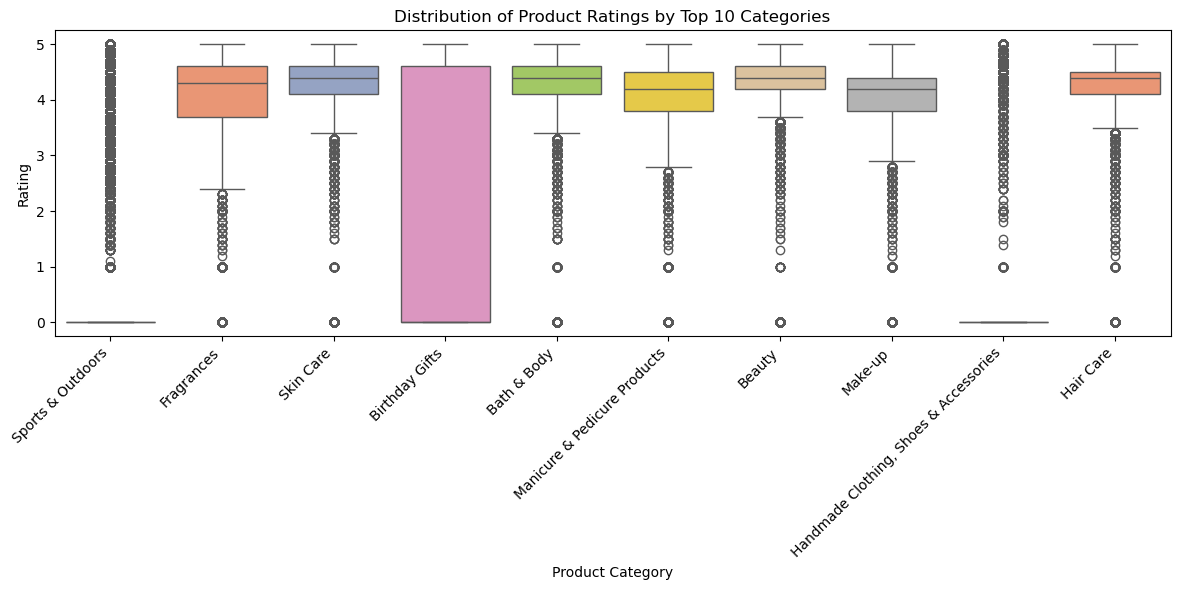

Category with highest median rating (all categories):
category
Computer Memory    4.7
Name: stars, dtype: float64


In [17]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. 
# Filter out the top 10 categories based on count for better visualization.
# Filter top 10 categories by count
top10_categories = df['category'].value_counts().nlargest(10).index
filtered_df = df[df['category'].isin(top10_categories)]

# Box plot for ratings by category 
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='category', y='stars', palette="Set2")

plt.title("Distribution of Product Ratings by Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Median rating by category (all categories, no filter)
median_ratings = df.groupby('category')['stars'].median().sort_values(ascending=False)
print("Category with highest median rating (all categories):")
print(median_ratings.head(1))

# Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

- Calculate the correlation coefficient between price and stars.
- Is there a significant correlation between product price and its rating?

In [20]:
# 1.Correlation Coefficients:

# Calculate the correlation coefficient between price and stars.

# Step 1: Drop missing values in price or rating
df_corr = df[['price', 'stars']].dropna()

# Step 2: Calculate Pearson correlation coefficient
correlation = df_corr['price'].corr(df_corr['stars'])

# Step 3: Display result
print(f"Correlation coefficient between price and rating: {correlation:.3f}")



Correlation coefficient between price and rating: -0.125


# Is there a significant correlation between product price and its rating?
with -0.125 as result of correlation coefficient, we can conclude that the correlation between price and rating is not significant

# 2.Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.

<Figure size 800x600 with 0 Axes>

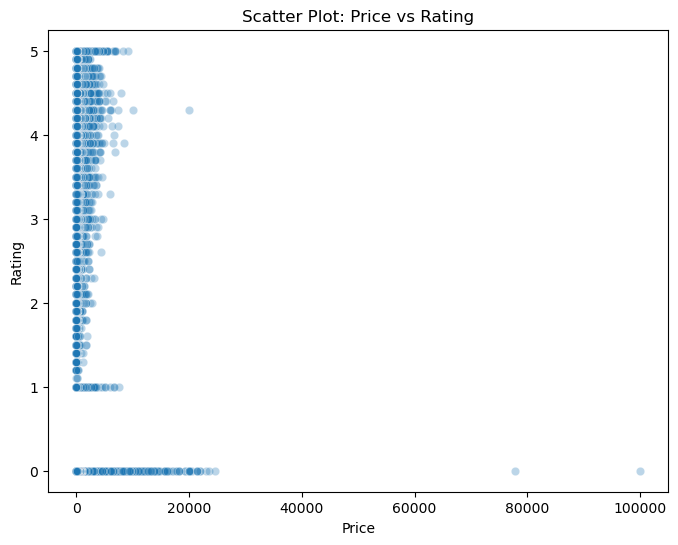

In [22]:
#  Scatter Plot to visualize the price  against the rating ('stars')
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='stars', alpha=0.3)
plt.title("Scatter Plot: Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

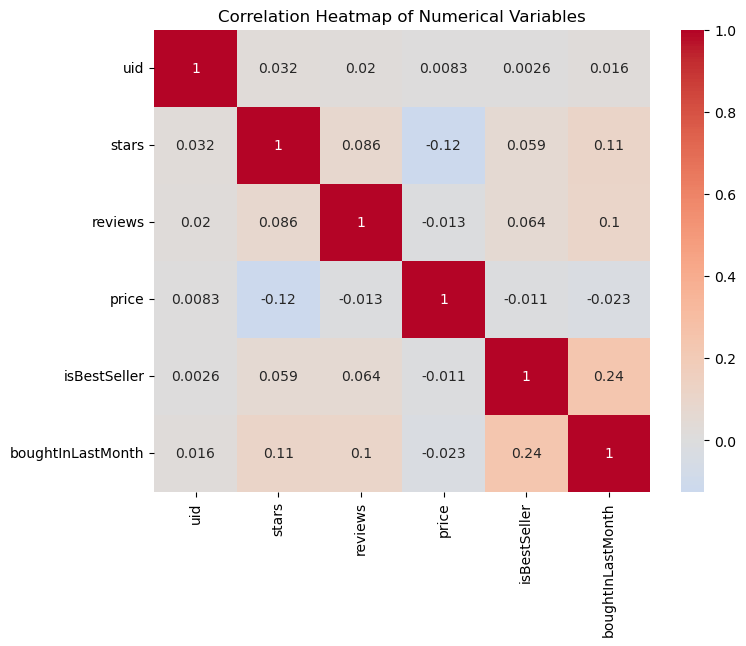

In [23]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

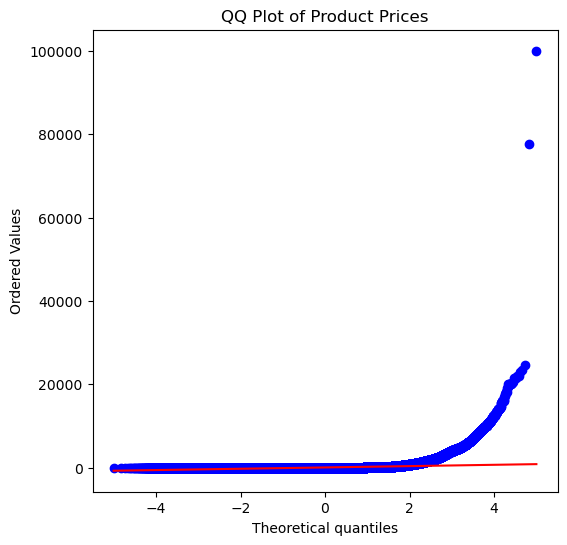

In [24]:
import scipy.stats as stats
# Examine if product prices typically follow a normal distribution using a QQ plot
plt.figure(figsize=(6,6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()

In [ ]:
Interpretation :
Based on the QQ plot, the product prices do not follow a normal distribution. 
While the lower and mid-range prices align somewhat with the theoretical line, there is a sharp upward deviation starting at 2 standard deviations. 
This indicates a strong right-skewed distribution with high-value outliers.